# Importing Packages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

print("Import Successful!")

Import Successful!


# Data Pre-Processing

In [16]:
dataset = pd.read_csv("/kaggle/input/social-networks-dataset/Social_Network_Ads.csv")
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [17]:
# Train - Test Split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.3 , random_state = 10 )

# Feature Scaling
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

# Model Fitting

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

# Test Result Prediction

In [20]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 1 1 0 1 1 0]


# Confusion Matrix Creation

In [22]:
cm = confusion_matrix( y_test , y_pred )
print(cm)

[[75  8]
 [ 1 36]]


# Visualization of Training Set

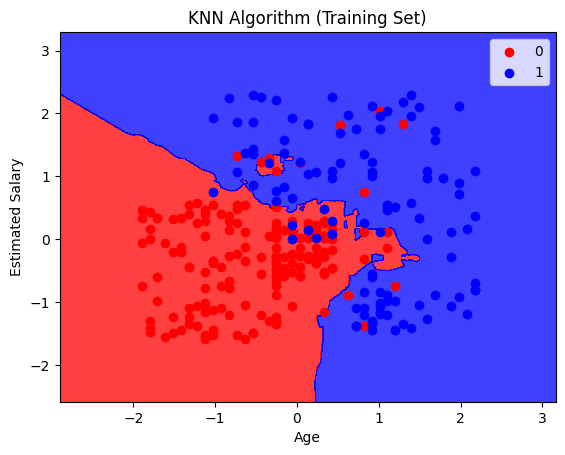

In [25]:
x_set , y_set = x_train , y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,
             cmap=ListedColormap(('red', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            color=ListedColormap(('red', 'blue'))(i), label=j)

plt.title("KNN Algorithm (Training Set)")
plt.xlabel("Age")
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualization of Testing Set

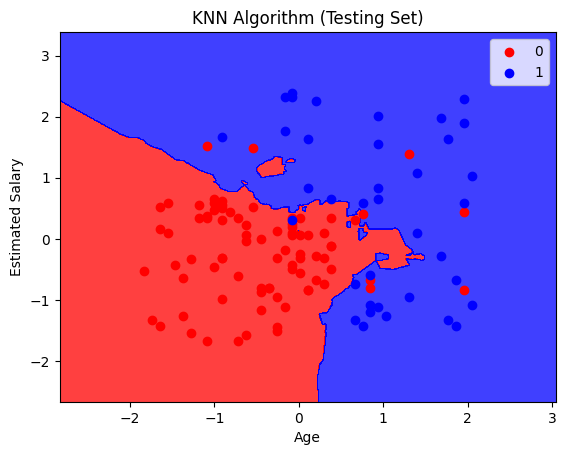

In [26]:
x_set , y_set = x_test , y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.75,
             cmap=ListedColormap(('red', 'blue')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
            color=ListedColormap(('red', 'blue'))(i), label=j)

plt.title("KNN Algorithm (Testing Set)")
plt.xlabel("Age")
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()